# 缩放窗口

此示例展示了如何将一个窗口中的事件（例如鼠标点击）连接到另一个图形窗口。

如果您在第一个窗口中点击一个点，第二个窗口的 z 和 y 限制将会调整，使得第二个窗口中的缩放中心将是点击点的 (x, y) 坐标。

请注意，散点图中圆的直径以点**2 定义，因此它们的大小与缩放无关。

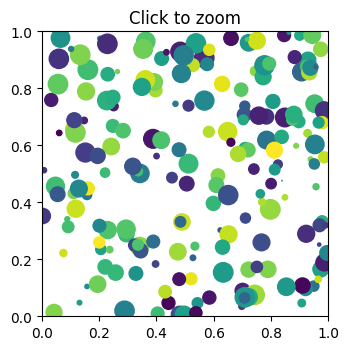

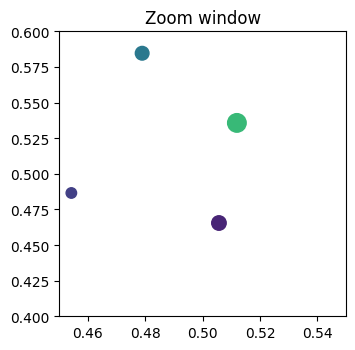

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

figsrc, axsrc = plt.subplots(figsize=(3.7, 3.7))
figzoom, axzoom = plt.subplots(figsize=(3.7, 3.7))
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def on_press(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', on_press)
plt.show()